In [1]:
library("GA")
library("tidyverse")

Loading required package: foreach
Loading required package: iterators
Package 'GA' version 3.2.1
Type 'citation("GA")' for citing this R package in publications.

Attaching package: 'GA'

The following object is masked from 'package:utils':

    de

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.0     v purrr   0.3.2
v tibble  2.1.3     v dplyr   0.8.1
v tidyr   0.8.3     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x purrr::accumulate() masks foreach::accumulate()
x dplyr::filter()     masks stats::filter()
x dplyr::lag()        masks stats::lag()
x purrr::when()       masks foreach::when()


In [2]:
obj <- function(x) {
  x1=x[1]
  x2=x[2]
  return (100*(x2-x1**2)**2+(1-x1)**2)
}

-- Differential Evolution -------------- 

DE settings: 
Type                  =  real-valued 
Population size       =  20 
Number of generations =  100 
Elitism               =  0 
Stepsize              =  0.8 
Crossover probability =  0.5 
Mutation probability  =  0 
Search domain = 
      x1 x2
lower -5 -5
upper  5  5

DE results: 
Iterations             = 100 
Fitness function value = -1.99277e-07 
Solution = 
            x1        x2
[1,] 0.9997938 0.9996272

iter,x.x1,x.x2,minf.x.
<int>,<dbl>,<dbl>,<dbl>
100,0.9997938,0.9996272,1.99277e-07


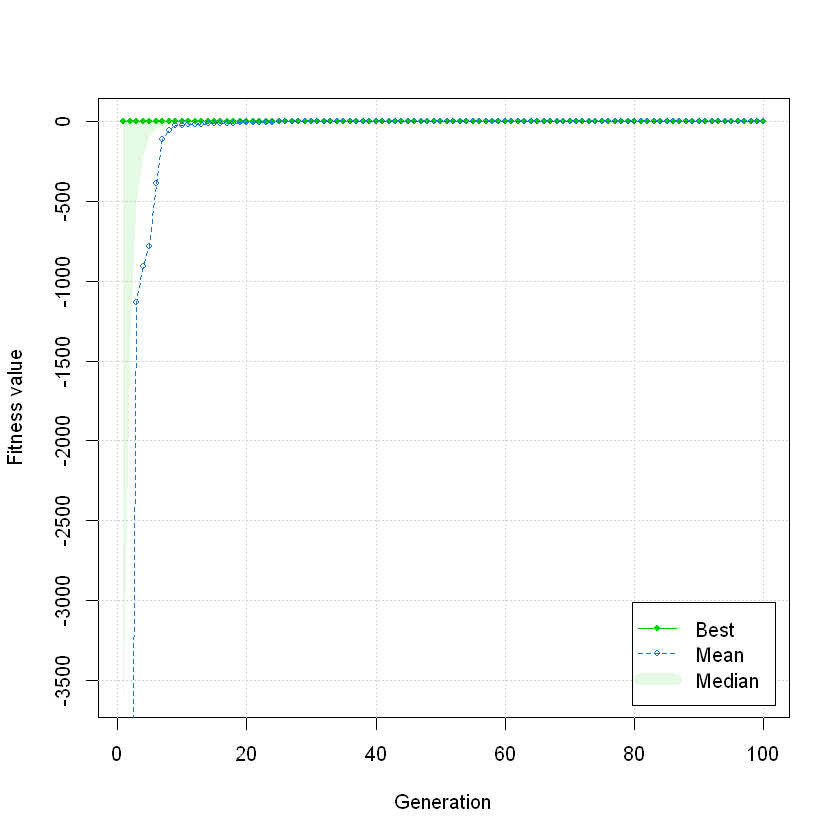

In [3]:
#part 1: One run GA in R with graph
ga_res = de(type = "real-valued",
  fitness=function(x) -obj(x), 
  keepBest = TRUE,
  lower = c(-5,-5), 
  upper = c(5,5))
summary(ga_res)
plot(ga_res)

GAsum<- data.frame("iter"=ga_res@iter,"x"=ga_res@solution, "minf(x)"=-ga_res@fitnessValue)
GAsum


iter,x1,x2,minf(x),CPU(time)
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100,0.9996313,0.9991933,6.163080e-07,0.11565804
100,0.9968266,0.9937695,1.119997e-05,0.11871600
100,0.9986366,0.9971951,2.498264e-06,0.10069585
100,1.0003405,1.0007178,2.495725e-07,0.12071109
100,1.0001334,1.0002432,7.360659e-08,0.11867785
100,1.0001880,1.0003720,3.710184e-08,0.10368609
100,0.9999064,0.9997082,1.103335e-06,0.09378195
100,0.9988229,0.9974405,5.654739e-06,0.10269189
100,0.9974575,0.9954994,3.987342e-05,0.10671210


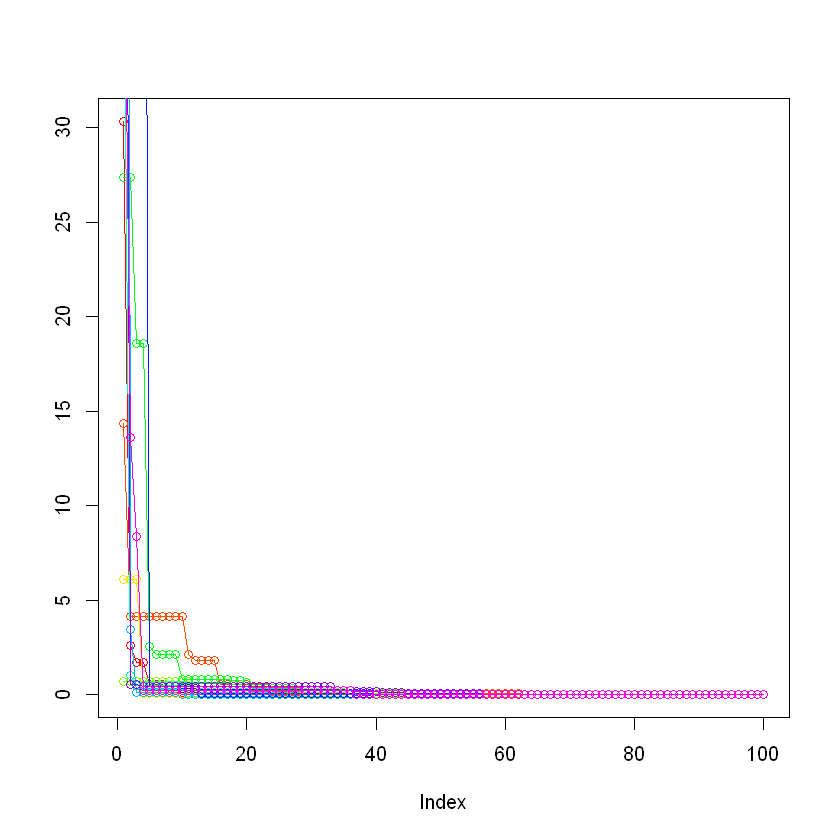

In [4]:
#part 2: 10 run table
df <- data.frame(matrix(ncol = 5, nrow = 0))
x1 <- c("iter", "x1","x2","minf(x)","CPU(time)")
val<-list()
for (i in 1:10){
  start_time <- Sys.time()
  ga_res = de(type = "real-valued",
              fitness=function(x) -obj(x), 
              keepBest = TRUE,
              lower = c(-5,-5), 
              upper = c(5,5))
  end_time <- Sys.time()
  tdif <- end_time - start_time
  df=rbind(df,c(ga_res@iter,ga_res@solution[1],ga_res@solution[2],-ga_res@fitnessValue,tdif))
  vec<-vector()
  for (j in 1:100){
    vec[j]=obj(ga_res@bestSol[[j]])
  }
  val[[i]]=vec
}
colnames(df) <- x1
name=c(1:10)
valdf <- as.data.frame(val)
colnames(valdf)<-name
df
colors<-rainbow(20)
plot(valdf[,10],type = "o",col=colors[1],ylab='')
for(i in 1:9){
  lines(valdf[,i], type = "o", col =colors[2*i])
}